In [19]:
# networkX

In [2]:
import time
import networkx as nx
import matplotlib.pylab as plt

In [5]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

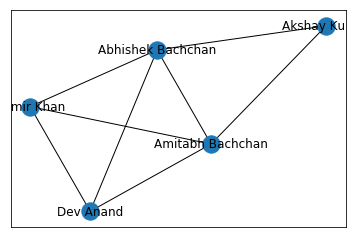

In [6]:
nx.draw_networkx(G_symmetric)

In [9]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

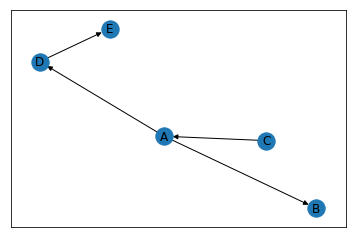

In [19]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

In [20]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)

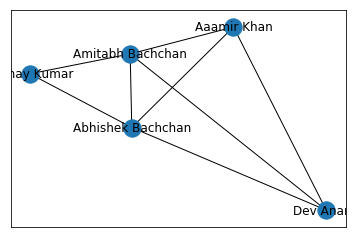

In [25]:
nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted)

In [28]:
G = nx.MultiGraph()
G.add_edge('A','B', relation ='neighbor')
G.add_edge('A','B', relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C', relation='friend')

0

In [29]:
MultiEdgeDataView([('A', 'B', {'relation': 'neighbor'}), ('A', 'B', {'relation': 'friend'}), ('B', 'C', {'relation': 'neighbor'}), ('B', 'D', {'relation': 'neighbor'}), ('C', 'D', {'relation': 'friend'})])

NameError: name 'MultiEdgeDataView' is not defined

In [31]:
nx.degree(G_symmetric, 'Dev Anand')

3

In [32]:
nx.average_clustering(G_symmetric)

0.8666666666666666

In [33]:
nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')

['Dev Anand', 'Abhishek Bachchan', 'Akshay Kumar']

In [3]:
G_fb = nx.read_edgelist("./data/facebook/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [35]:
print(nx.info(G_fb)) # 정보

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


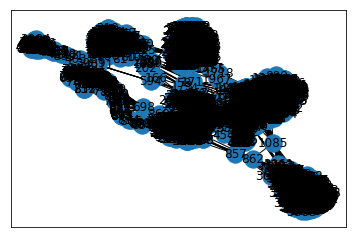

In [38]:
nx.draw_networkx(G_fb) # 기본 그리기

In [6]:
%%time # 50s
pos = nx.spring_layout(G_fb) 

Wall time: 50.8 s


In [7]:
%%time # 2min
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)

Wall time: 2min 20s


Wall time: 8.76 s


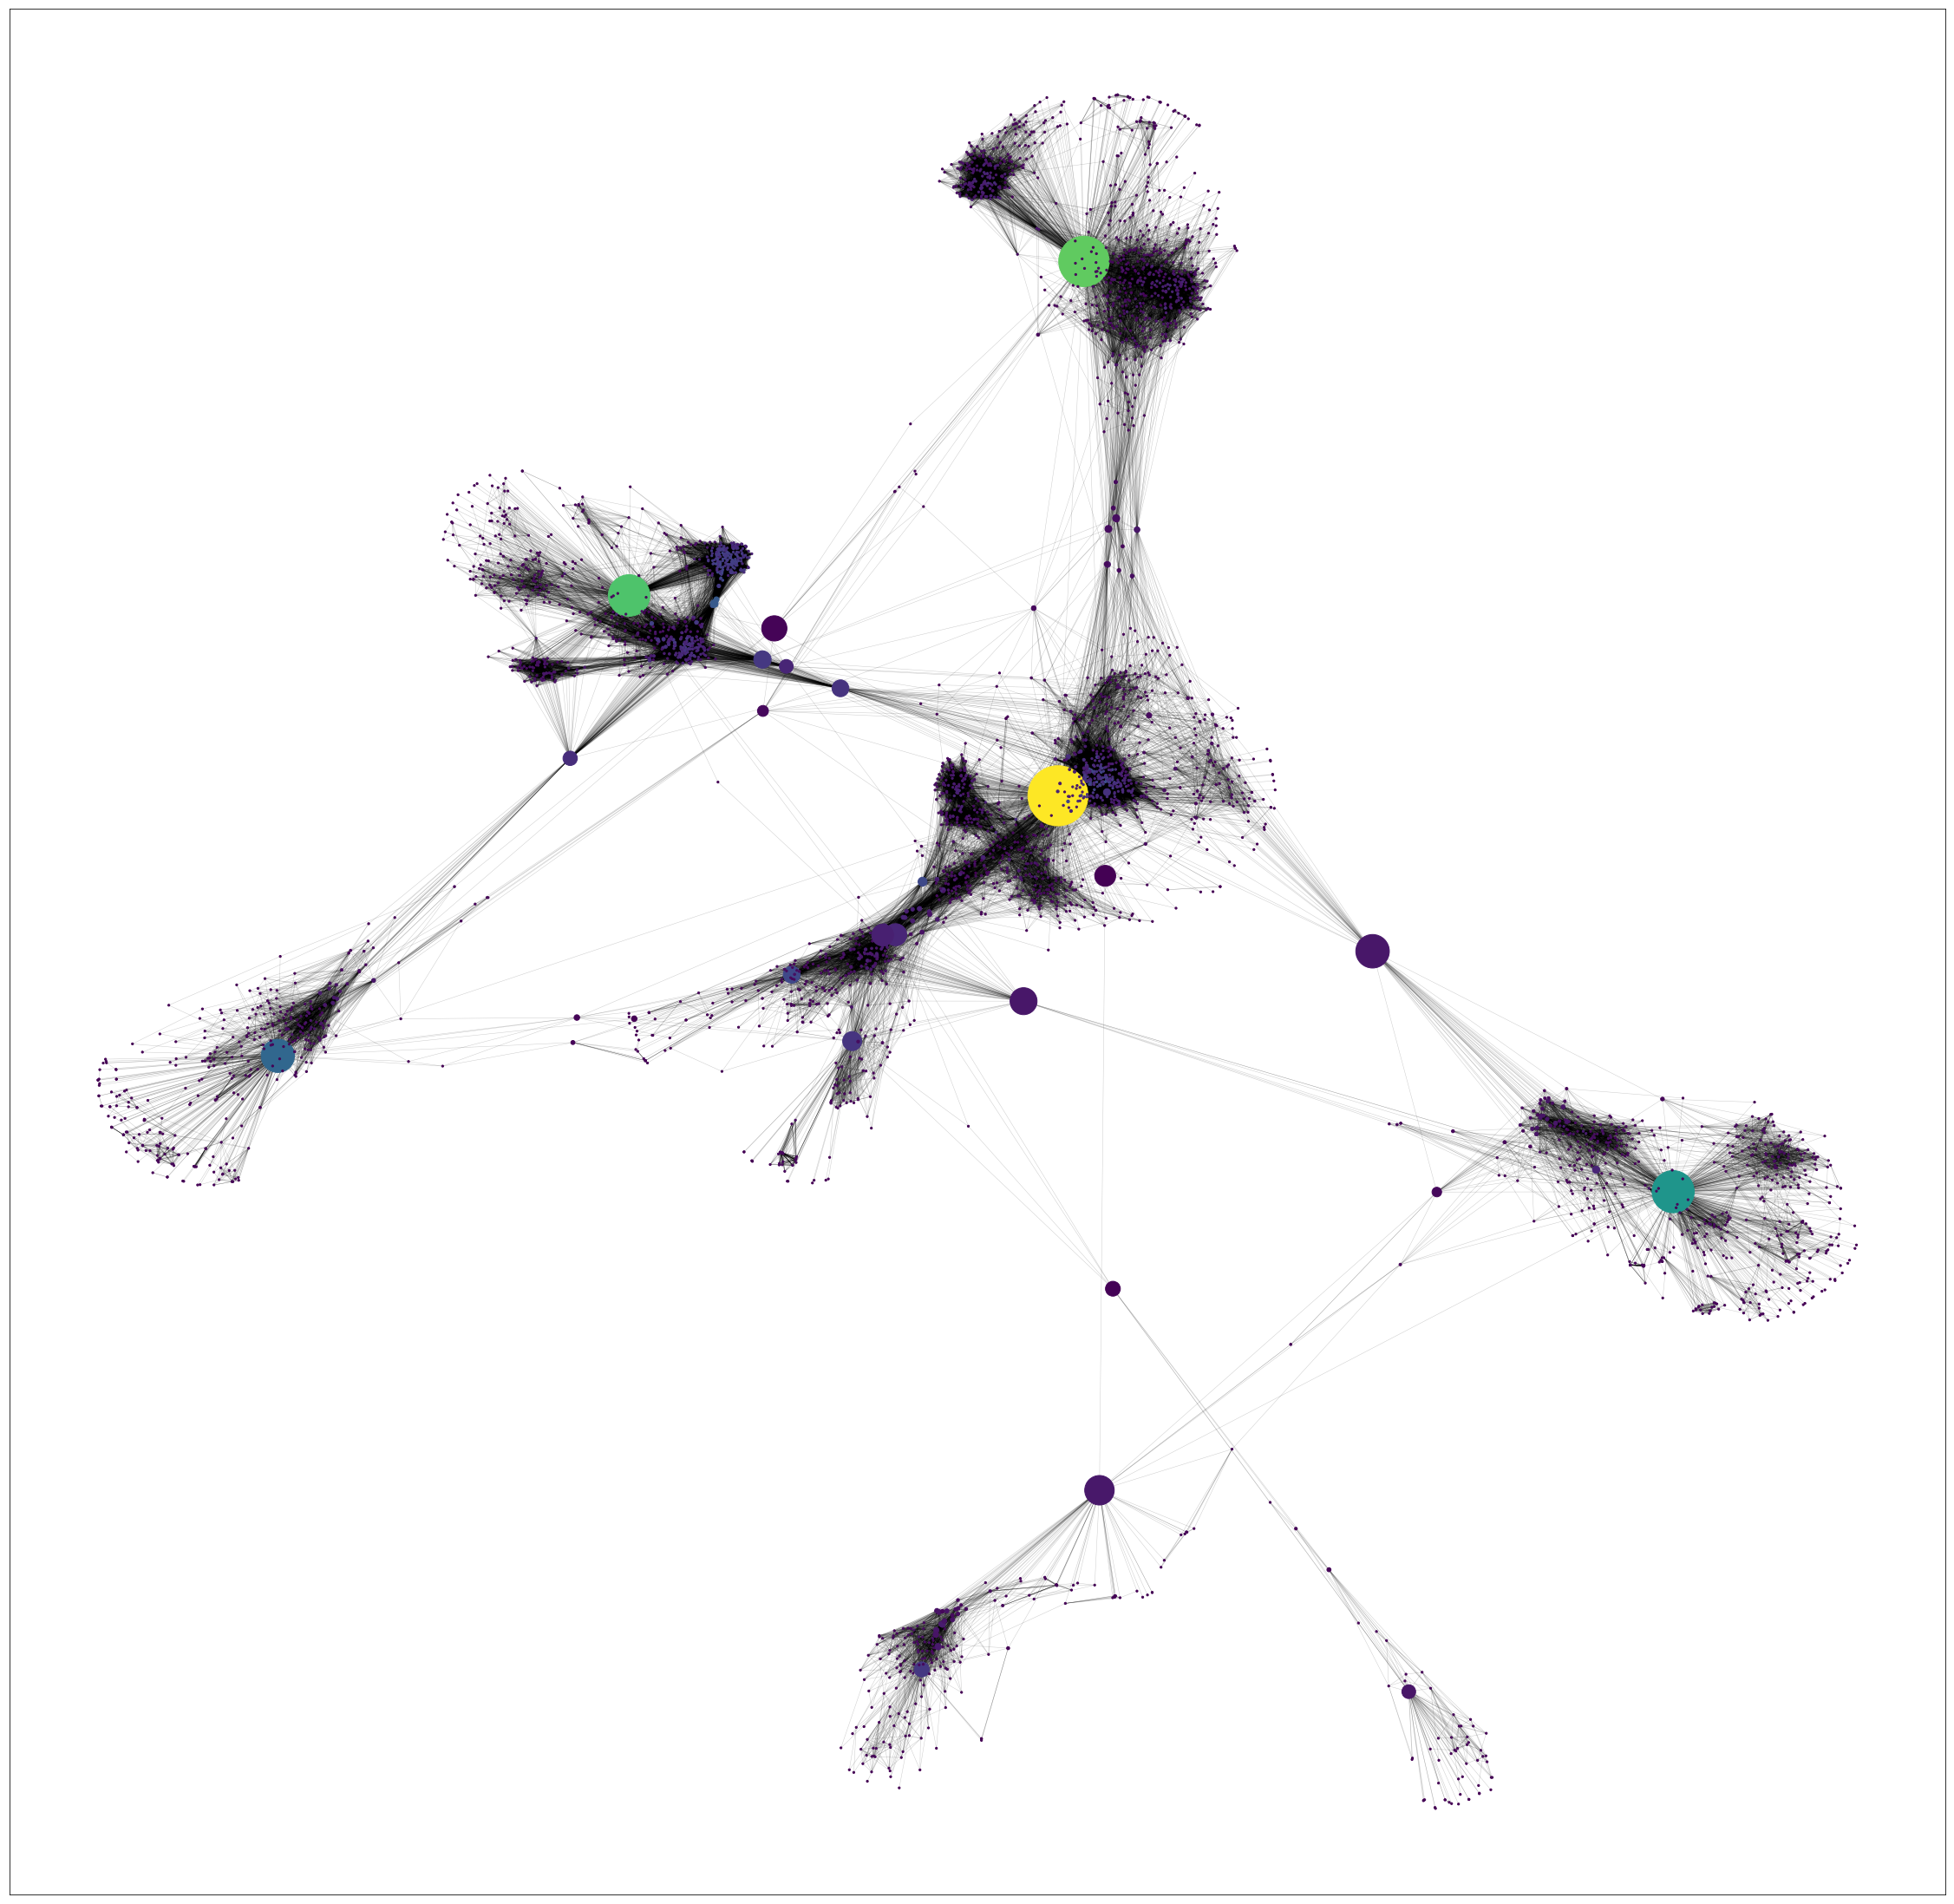

In [46]:
%%time
node_color = [20000.0 * G_fb.degree(v) for v in G_fb] # node는 연결점
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(40,40)) # 화면크기 조정?

# nodes와 edges따로 그리면 세부설정가능
nx.draw_networkx_nodes(G_fb, pos=pos, with_labels=True, node_color=node_color,node_size=node_size)
nx.draw_networkx_edges(G_fb, pos=pos, alpha=0.2, width=0.5)
# nx.draw_networkx_labels(G_fb, pos=pos, alpha=0.5, size=6, font_weight='300') # label은 mouse action으로 할수없을까?

# plt.axis('off')
plt.savefig("graph.pdf")